# San Francisco Police Dept. Crime Prediction (CS 194 Project)
### Anand Kuchibotla, Harish Shanker, Kunal Roy, Alex Romano

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sklearn
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150840356,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,09/24/2015,23:51,RICHMOND,NONE,400 Block of 26TH AV,-122.485806,37.780991,"(37.7809908061782, -122.485806034088)",15084035628150
1,156238559,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,09/24/2015,23:45,SOUTHERN,NONE,HARRISON ST / 11TH ST,-122.412483,37.770631,"(37.7706305910776, -122.41248326348)",15623855906244
2,156238719,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,09/24/2015,23:30,SOUTHERN,NONE,1400 Block of HARRISON ST,-122.411939,37.771134,"(37.7711341126595, -122.411939261411)",15623871906244
3,150841100,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,09/24/2015,23:30,NORTHERN,NONE,800 Block of POLK ST,-122.419480,37.784270,"(37.7842697641002, -122.419480276468)",15084110028160
4,150840817,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,09/24/2015,23:30,RICHMOND,NONE,700 Block of 18TH AV,-122.476691,37.773831,"(37.7738311003572, -122.476691497828)",15084081707021
5,150840538,FAMILY OFFENSES,MINOR WITHOUT PROPER PARENTAL CARE,Thursday,09/24/2015,23:28,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",15084053829110
6,150840312,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,09/24/2015,23:22,INGLESIDE,NONE,MOLIMO DR / MYRA WY,-122.451605,37.737754,"(37.7377539677995, -122.451605350304)",15084031264020
7,156237705,NON-CRIMINAL,LOST PROPERTY,Thursday,09/24/2015,23:10,SOUTHERN,NONE,1000 Block of MARKET ST,-122.411340,37.781271,"(37.7812707434494, -122.411339562557)",15623770571000
8,150840271,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Thursday,09/24/2015,23:01,CENTRAL,"ARREST, BOOKED",BUSH ST / TAYLOR ST,-122.412079,37.789739,"(37.7897391550377, -122.412078903704)",15084027165050
9,150845271,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Thursday,09/24/2015,23:00,MISSION,NONE,POTRERO AV / CESAR CHAVEZ ST,-122.405097,37.749110,"(37.7491100050973, -122.405096871916)",15084527171010


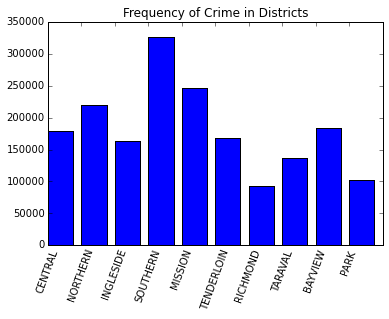

In [4]:
districts = dict(df['PdDistrict'].value_counts())
        
plt.title('Frequency of Crime in Districts')
bins = np.arange(len(districts))
plt.bar(bins, districts.values(), width=0.75)
plt.xticks(bins, list(districts.keys()), rotation=70, ha='center')
plt.show()

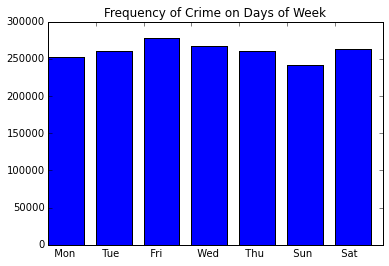

In [5]:
dow = dict(df['DayOfWeek'].value_counts())
        
plt.title('Frequency of Crime on Days of Week')
bins = np.arange(len(dow))
plt.bar(bins, dow.values(), width=0.75)
plt.xticks(bins, ['  ' + d[:3] for d in dow.keys()], ha='left')
plt.show()

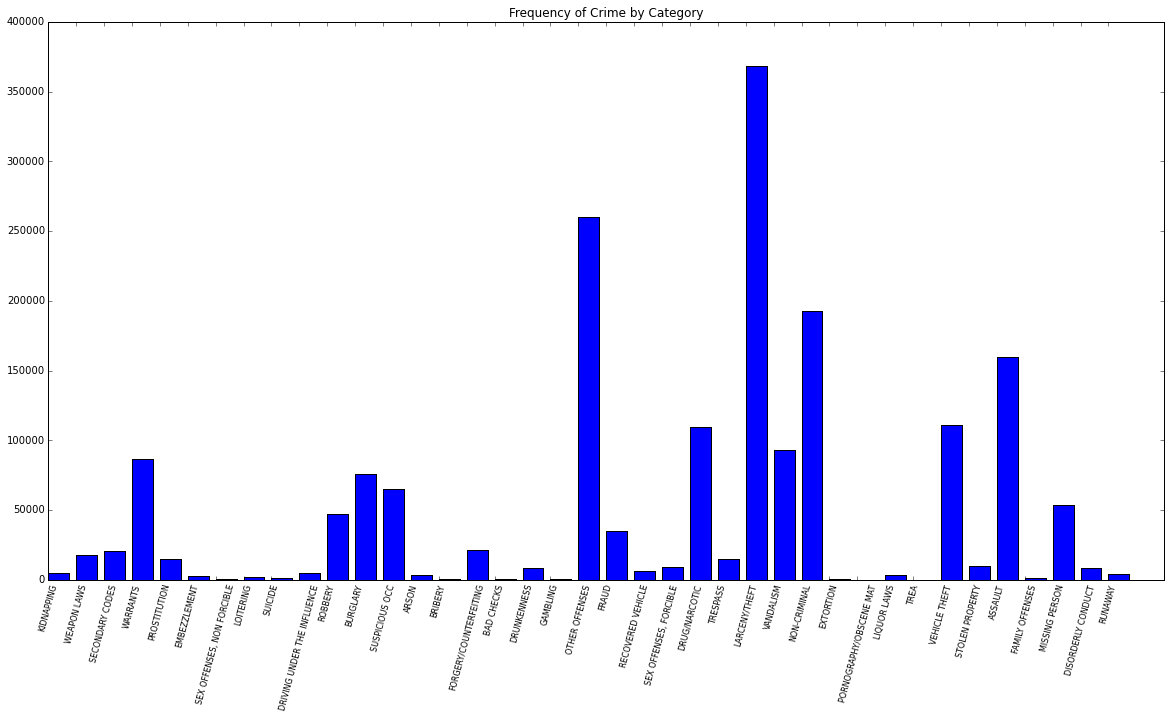

In [6]:
cats = dict(df['Category'].value_counts())

plt.figure(figsize=(20, 10))
plt.title('Frequency of Crime by Category')
bins = np.arange(len(cats))
plt.bar(bins, cats.values(), width=0.75)
plt.xticks(bins, list(cats.keys()), rotation=75, size=8, ha='center')
plt.show()

['GRAND THEFT FROM LOCKED AUTO', 'DRIVERS LICENSE, SUSPENDED OR REVOKED', 'MALICIOUS MISCHIEF, VANDALISM', 'STOLEN AUTOMOBILE', 'BATTERY', 'SUSPICIOUS OCCURRENCE', 'WARRANT ARREST', 'LOST PROPERTY', 'FOUND PROPERTY', 'PETTY THEFT FROM LOCKED AUTO', 'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'AIDED CASE, MENTAL DISTURBED', 'TRAFFIC VIOLATION', 'PETTY THEFT OF PROPERTY', 'THREATS AGAINST LIFE']


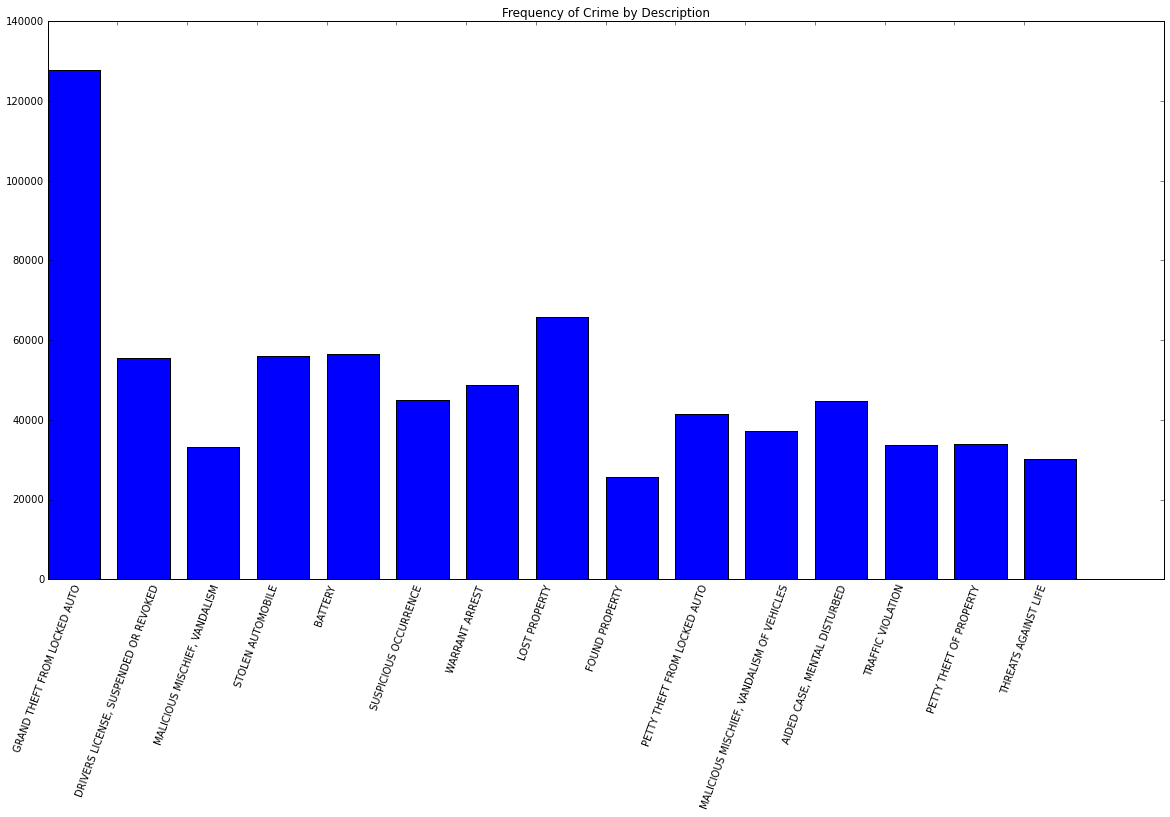

In [7]:
descs = dict(df['Descript'].value_counts()[:15])

print descs.keys()

plt.figure(figsize=(20,10))
plt.title('Frequency of Crime by Description')
bins = np.arange(len(descs))
plt.bar(bins, descs.values(), width=0.75)
plt.xticks(bins, list(descs.keys()), rotation=70, ha='center')
plt.show()

In [8]:
times_lists = {'6AM-10AM': [], '10AM-2PM': [], '2PM-6PM': [], '6PM-10PM': [], '10PM-2AM': [], '2AM-6AM': []}
location_lists = {'6AM-10AM': [], '10AM-2PM': [], '2PM-6PM': [], '6PM-10PM': [], '10PM-2AM': [], '2AM-6AM': []}
dow = {}
cats_lists = {}

for c in set(df['Category']):
    cats_lists[c] = {'6AM-10AM': 0, '10AM-2PM': 0, '2PM-6PM': 0, '6PM-10PM': 0, '10PM-2AM': 0, '2AM-6AM': 0}

for i in range(len(df)):
    
    hour = int(df['Time'][i].split(':')[0])
    cat = df['Category'][i]
    location = (float(df['Y'][i]), float(df['X'][i]))
    
    if hour in range(6, 10):
        times_lists['6AM-10AM'].append(cat)
        cats_lists[cat]['6AM-10AM'] += 1 
        location_lists['6AM-10AM'].append(location)
    elif hour in range(10, 14):
        times_lists['10AM-2PM'].append(cat)
        cats_lists[cat]['10AM-2PM'] += 1 
        location_lists['10AM-2PM'].append(location)
    elif hour in range(14, 18):
        times_lists['2PM-6PM'].append(cat)
        cats_lists[cat]['2PM-6PM'] += 1 
        location_lists['2PM-6PM'].append(location)
    elif hour in range(18, 22):
        times_lists['6PM-10PM'].append(cat)
        cats_lists[cat]['6PM-10PM'] += 1 
        location_lists['6PM-10PM'].append(location)
    elif hour in range(22, 25) or hour in range(0, 2):
        times_lists['10PM-2AM'].append(cat)
        cats_lists[cat]['10PM-2AM'] += 1 
        location_lists['10PM-2AM'].append(location)
    elif hour in range(2, 6):
        times_lists['2AM-6AM'].append(cat)
        cats_lists[cat]['2AM-6AM'] += 1 
        location_lists['2AM-6AM'].append(location)

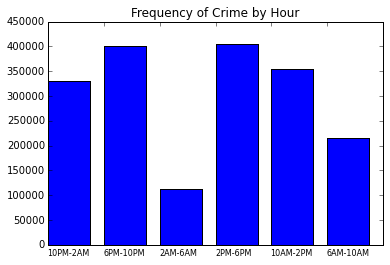

In [9]:
times = {}
for key in times_lists:
    times[key] = len(times_lists[key])

plt.title('Frequency of Crime by Hour')
bins = np.arange(len(times))
plt.bar(bins, times.values(), width=0.75)
plt.xticks(bins, list(times.keys()), size=8, ha='left')
plt.show()

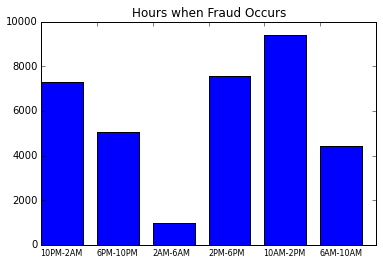

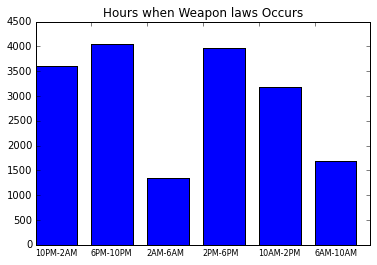

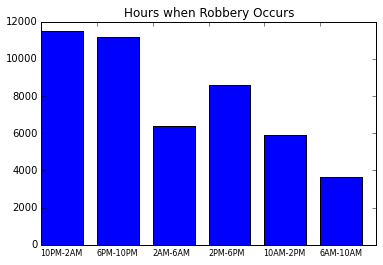

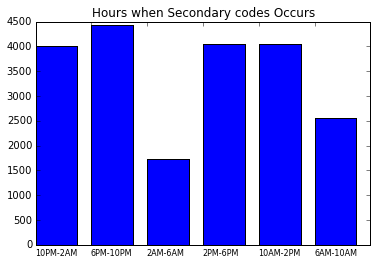

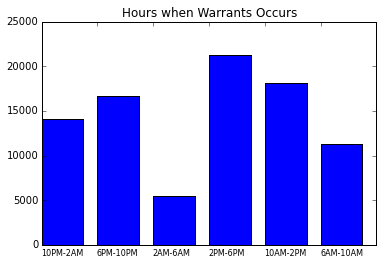

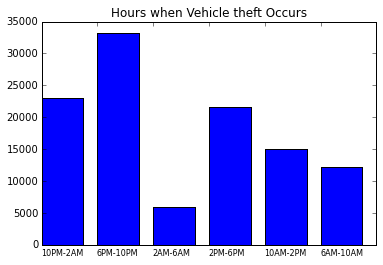

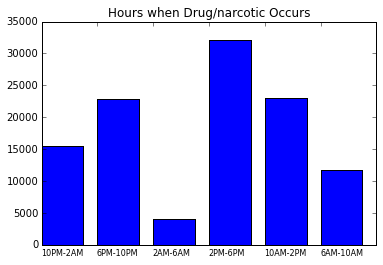

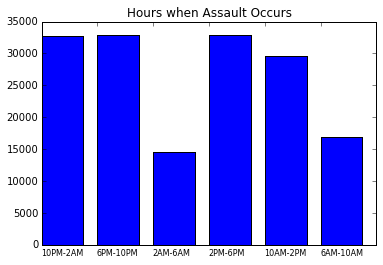

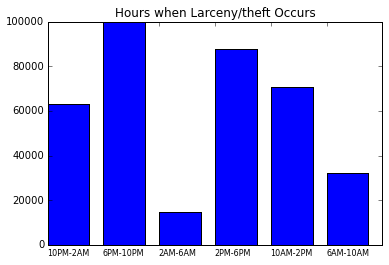

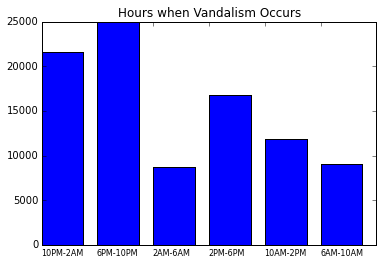

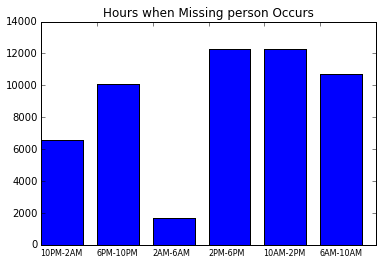

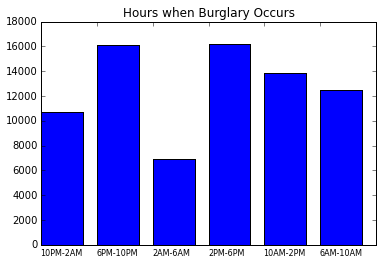

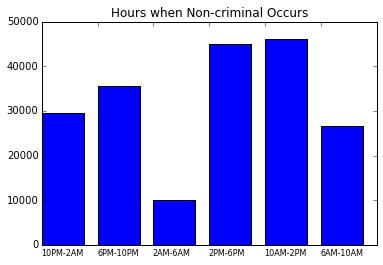

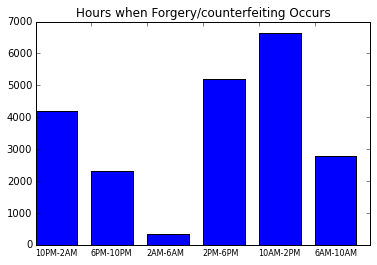

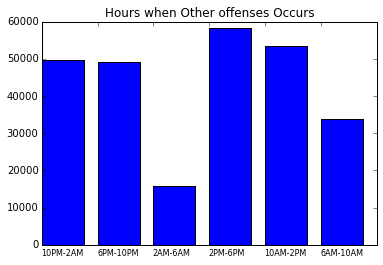

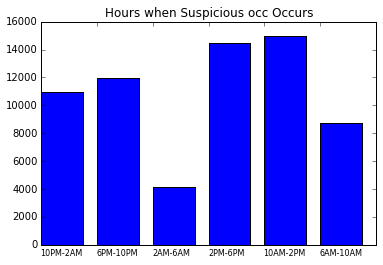

In [10]:
crimes = list(dict(df['Category'].value_counts()[:16]).keys())
for crime in crimes:
    c = cats_lists[crime]
    plt.title('Hours when ' + crime[0] + crime[1:].lower() + ' Occurs')
    bins = np.arange(len(c))
    plt.bar(bins, c.values(), width=0.75)
    plt.xticks(bins, list(c.keys()), size=8, ha='left')
    plt.show()

In [ ]:
colors = ['red', 'green', 'blue', 'gray', 'purple', 'orange']
c = 0

plt.figure(figsize=(50,50))

for key in location_lists:
    for i in location_lists[key][:10000]:
        plt.scatter(i[0], i[1], color=colors[c])
    c += 1

In [ ]:
# End goal: Proposes route using least dangerous generated route from direction api

# This cell trains general naive bayes classifiers (1 for each single crime)

# Presume that every crime happens independent of otheres, which might not be the best assumption

count=0
CrimeToSeq={}
SeqToCrime={}

# 11 most frequent 'violent' crimes found
violentCrimeFactor={'GRAND THEFT FROM LOCKED AUTO':2, 'MALICIOUS MISCHIEF:':0.5, 'VANDALISM':0.7, 'STOLEN AUTOMOBILE':3, 'BATTERY':3.5, 'SUSPICIOUS OCCURRENCE':0.8, 'WARRANT ARREST':1.5, 'PETTY THEFT FROM LOCKED AUTO':1.3, 'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES':1.4, 'AIDED CASE, MENTAL DISTURBED':1.5, 'PETTY THEFT OF PROPERTY':1.2, 'THREATS AGAINST LIFE':2.4}

# for crime in violentCrimes:
#     CrimeToSeq[crime]=count
#     count+=1
# for crime in CrimeToSeq.keys():
#     SeqToCrime[CrimeToSeq[crime]]=crime


##################################
# Gaussian NB classifier         #
# Fitting(time,location)--> crime#
# P(crime)|features set          #
##################################

gnb=GaussianNB()
LabelY=df['Category'].tolist() # Prediction categories

TrainX=df[['X','Y']]  # Add time later 
TrainX=[tuple(x) for x in TrainX.values]
    
gnb.fit(TrainX,LabelY) # Fit on test set 

probs=gnb.predict_proba(TrainX)
# print prob
# print TrainX

def danger_rating(x,y):
    class_pred=gnb.predict_proba(np.array((x,y)))
    print class_pred

# 
danger_rating(32.792131, -128.443835267233)
        


